**RUN ALL THE CELLS AND DON'T EDIT ANY CELL**

**CODE IN THE MENTIONED CELLS ONLY**

## Import Necessary Files

In [19]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

Add ```/path/to/your/folder``` to load the images

In [20]:
cartoon = cv2.imread("./cartoon.bmp")
cartoon_y = cv2.imread("./cartoon_y.jpg")
girl = cv2.imread("./girl.png") #grayscale image
girl_y = cv2.imread("./girl_y.jpg")
fingerprint = cv2.imread("./fingerprint.jpg")
fingerprint_y = cv2.imread("./fingerprint_y.jpg")

## Raw and Final Image
You need to process the raw images: ```cartoon, girl, fingerprint``` to get the processed images: ```cartoon_y, girl_y, fingerprint_y```

Your processed image need not be 100% alike given processed image. They are given to give you an idea of what to process in the raw images.

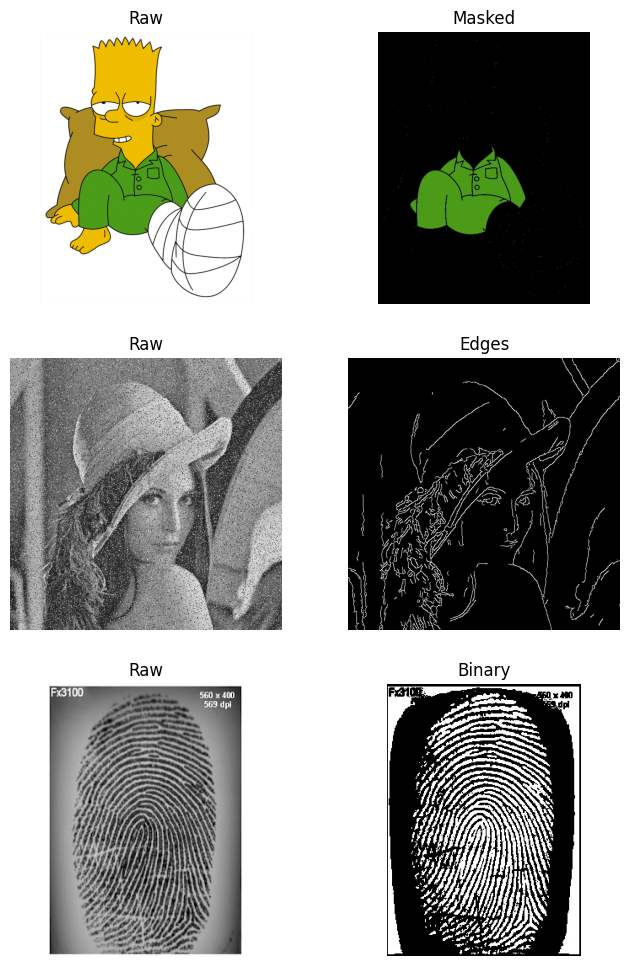

In [21]:
fig, axs = plt.subplots(3,2,figsize=(8,12))
axs[0,0].imshow(cv2.cvtColor(cartoon,cv2.COLOR_BGR2RGB))
axs[0,1].imshow(cartoon_y)
axs[0,0].axis("off")
axs[0,1].axis("off")
axs[0,0].set_title("Raw")
axs[0,1].set_title("Masked")
axs[1,0].imshow(girl)
axs[1,1].imshow(girl_y)
axs[1,0].axis("off")
axs[1,1].axis("off")
axs[1,0].set_title("Raw")
axs[1,1].set_title("Edges")
axs[2,0].imshow(cv2.cvtColor(fingerprint,cv2.COLOR_BGR2RGB))
axs[2,1].imshow(fingerprint_y)
axs[2,0].axis("off")
axs[2,1].axis("off")
axs[2,0].set_title("Raw")
axs[2,1].set_title("Binary")
plt.show()

## Code in the following 3 cells only

### Cartoon
For the bart image, you need to mask the dress. Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

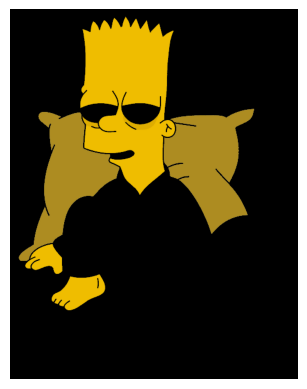

In [24]:
#START CODE HERE (Do all your processing here)
def mask_dress(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Convert the image to RGB format
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert the image to HSV format
    image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

    # Define the range for the dress color (example for yellow dress)
    lower_color = np.array([20, 100, 100])
    upper_color = np.array([30, 255, 255])

    # Create a mask
    mask = cv2.inRange(image_hsv, lower_color, upper_color)

    # Apply the mask to the image
    masked_image = cv2.bitwise_and(image_rgb, image_rgb, mask=mask)

    return masked_image
cartoon_y_mentee = mask_dress("./cartoon.bmp")
# plt.imshow(cartoon_y_mentee)
# plt.axis('off')
# plt.show()

#END CODE HERE (the final processed image should be cartoon_y_mentee)

### Girl
For the girl image, you need to detect the edges. Write all your code in the cell below and the final image should be stored in ```girl_y_mentee``` variable only or it'll show error later.

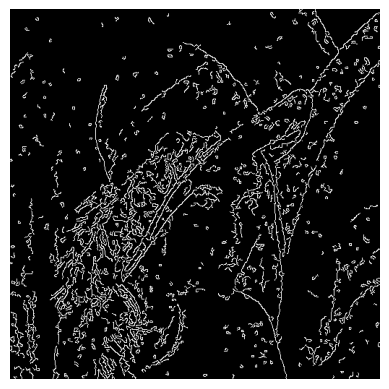

In [26]:
#START CODE HERE (Do all your processing here)
def detect_edges(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Gaussian blur to the image
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Detect edges using Canny edge detection
    edges = cv2.Canny(blurred_image, 100, 200)

    return edges
girl_y_mentee = detect_edges("./girl.png")

# Display the result (Optional for visualization)
plt.imshow(girl_y_mentee, cmap='gray')
plt.axis('off')
plt.show()

#END CODE HERE (the final processed image should be girl_y_mentee)

### Fingerprint
For the fingerprint image, you need to convert it to binary image. Binary images have 2 intensities only (0 or 255). Write all your code in the cell below and the final image should be stored in ```cartoon_y_mentee``` variable only or it'll show error later.

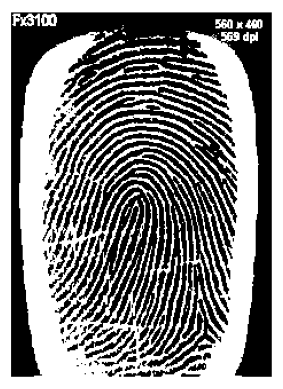

In [27]:
#START CODE HERE (Do all your processing here)

# Function to convert the image to a binary image
def convert_to_binary(image_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply binary thresholding
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    return binary_image

# Path to the fingerprint image
image_path = './fingerprint.jpg'  # Change the path accordingly

# Process the image to convert to binary
fingerprint_y_mentee = convert_to_binary(image_path)

# Display the result (Optional for visualization)
plt.imshow(fingerprint_y_mentee, cmap='gray')
plt.axis('off')
plt.show()

#END CODE HERE (the final processed image should be fingerprint_y_mentee)


## Comparison

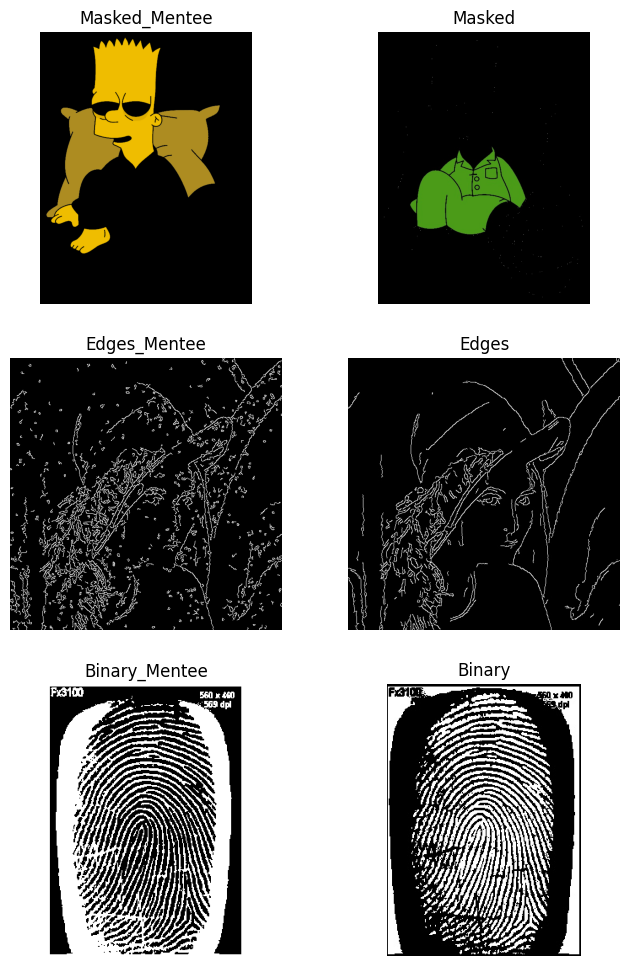

In [28]:
fig, axs1 = plt.subplots(3,2,figsize=(8,12))
axs1[0,0].imshow(cartoon_y_mentee)
axs1[0,1].imshow(cartoon_y)
axs1[0,0].axis("off")
axs1[0,1].axis("off")
axs1[0,0].set_title("Masked_Mentee")
axs1[0,1].set_title("Masked")
axs1[1,0].imshow(girl_y_mentee,cmap="gray")
axs1[1,1].imshow(girl_y)
axs1[1,0].axis("off")
axs1[1,1].axis("off")
axs1[1,0].set_title("Edges_Mentee")
axs1[1,1].set_title("Edges")
axs1[2,0].imshow(fingerprint_y_mentee,cmap="gray")
axs1[2,1].imshow(fingerprint_y)
axs1[2,0].axis("off")
axs1[2,1].axis("off")
axs1[2,0].set_title("Binary_Mentee")
axs1[2,1].set_title("Binary")
plt.show()